<a href="https://colab.research.google.com/github/lucassuryana/Data-Processing-Raspberry-Blower/blob/main/Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# membuka koneksi ke google drive
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [3]:
import pandas as pd
csv_loc = '/content/drive/Shareddrives/CITEVent/Blower Mini Project/Korelasi PWM - RPM - Flow/Code/percent_rpm_flow.csv'
data = pd.read_csv(csv_loc)
data

,percent,flow(L/min),std_dev,hz,rpm
0,10.0,16.27954,0.273000,54,3240
1,20.0,33.33639,0.625679,100,6000
2,30.0,49.53398,0.734054,150,9000
3,40.0,64.93298,1.335865,190,11400
4,50.0,80.03840,1.067660,230,13800
5,60.0,94.67718,1.120981,270,16200
6,70.0,108.35320,1.134905,300,18000
7,80.0,120.79460,1.151866,340,20400
8,90.0,134.79460,1.963726,375,22500
9,100.0,150.09520,2.228128,416,24960


In [125]:
# regresi antara flow dan percent
from sklearn.linear_model import LinearRegression
X = data.iloc[:,0].values.reshape(-1,1)
y = data.iloc[:,1].values
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

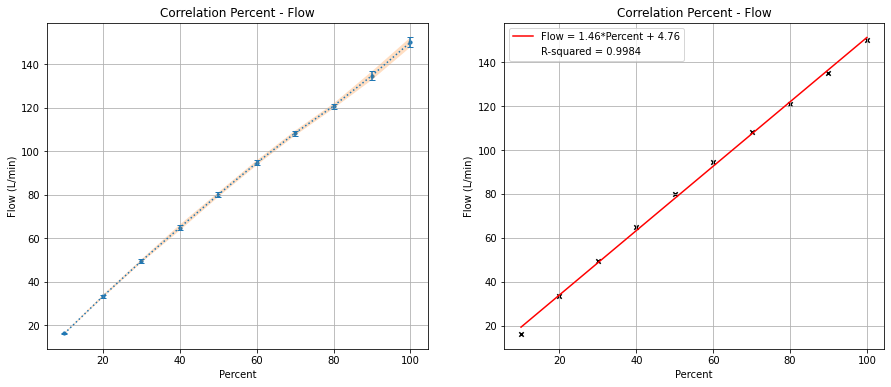

In [126]:
import matplotlib.pyplot as plt
# skema data yang akan digunakan untuk plot errorbar
data_list = {
    'x': list(data.iloc[:,0]),
    'y': list(data.iloc[:,1]),
    'yerr': list(data.iloc[:,2])}

# buat figure dan axes
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 6))
#fig, (ax1, ax2) = plt.subplots(2)
# plot scatter plot nilai percent dan flow
ax1.scatter(data['percent'], data['flow(L/min)'], s=10)
# plot error bar berupa +- standar deviasa pada scatter plot
ax1.errorbar(**data_list, alpha=1, fmt=':', capsize=3, capthick=1)

# skema data perbaikan data_list untuk fill_between
data_list = {
    'x': data_list['x'],
    'y1': [y - e for y, e in zip(data_list['y'], data_list['yerr'])],
    'y2': [y + e for y, e in zip(data_list['y'], data_list['yerr'])]}
# plot data untuk mengisi celah antara error
ax1.fill_between(**data_list, alpha=.25)
ax1.grid()
ax1.set_title('Correlation Percent - Flow')
ax1.set_xlabel('Percent')
ax1.set_ylabel('Flow (L/min)')

# set limit dari x-axis dan y-axis
#plt.xlim(0,40)
#plt.ylim(15,40)

# plot hasil regresi
ax2.plot(X, lin_reg.predict(X), color = 'red', label=('Flow = '+str(lin_reg.fit(X, y).coef_[0].round(2))+'*Percent'+' + '+str(lin_reg.fit(X, y).intercept_.round(2)))
)
plt.plot([], [], ' ', label=('R-squared = '+str(round(lin_reg.score(X, y),4))))
ax2.scatter(data['percent'], data['flow(L/min)'], s=20, marker = 'x', color='black')
ax2.legend()

ax2.grid()
ax2.set_title('Correlation Percent - Flow')
ax2.set_xlabel('Percent')
ax2.set_ylabel('Flow (L/min)')

fig.savefig('percent-flow.png', dpi=300)

In [127]:
# regresi antara flow dan rpm
from sklearn.linear_model import LinearRegression
X = data.iloc[:,4].values.reshape(-1,1)
y = data.iloc[:,1].values
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

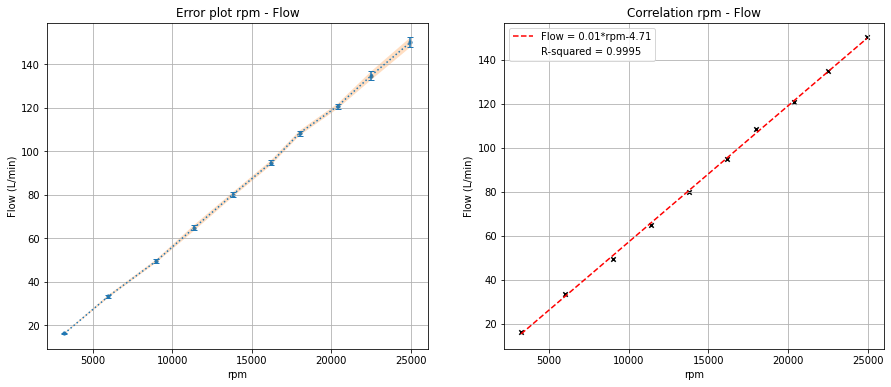

In [128]:
import matplotlib.pyplot as plt
# skema data yang akan digunakan untuk plot errorbar
data_list = {
    'x': list(data.iloc[:,4]),
    'y': list(data.iloc[:,1]),
    'yerr': list(data.iloc[:,2])}

# buat figure dan axes
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 6))
#fig, (ax1, ax2) = plt.subplots(2)
# plot scatter plot nilai percent dan flow
ax1.scatter(data['rpm'], data['flow(L/min)'], s=10)
# plot error bar berupa +- standar deviasa pada scatter plot
ax1.errorbar(**data_list, alpha=1, fmt=':', capsize=3, capthick=1)

# skema data perbaikan data_list untuk fill_between
data_list = {
    'x': data_list['x'],
    'y1': [y - e for y, e in zip(data_list['y'], data_list['yerr'])],
    'y2': [y + e for y, e in zip(data_list['y'], data_list['yerr'])]}
# plot data untuk mengisi celah antara error
ax1.fill_between(**data_list, alpha=.25)
ax1.grid()
ax1.set_title('Error plot rpm - Flow')
ax1.set_xlabel('rpm')
ax1.set_ylabel('Flow (L/min)')

# set limit dari x-axis dan y-axis
#plt.xlim(0,40)
#plt.ylim(15,40)

# plot hasil regresi
ax2.plot(X, lin_reg.predict(X), '--r', label=('Flow = '+str(lin_reg.fit(X, y).coef_[0].round(2))+'*rpm'+str(lin_reg.fit(X, y).intercept_.round(2)))
)
plt.plot([], [], ' ', label=('R-squared = '+str(round(lin_reg.score(X, y),4))))
ax2.scatter(data['rpm'], data['flow(L/min)'], s=20, marker = 'x', color='black')
ax2.legend()
ax2.grid()
ax2.set_title('Correlation rpm - Flow')
ax2.set_xlabel('rpm')
ax2.set_ylabel('Flow (L/min)')

fig.savefig('rpm-flow.png', dpi=300)